<a href="https://colab.research.google.com/github/smitapatil1/simple-linear-regration/blob/main/salary_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
dataset=pd.read_csv("/content/Salary_Data (3).csv")

In [3]:
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


# EDA and Data Visualization

In [4]:
dataset.shape

(30, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
dataset[dataset.duplicated()]

,YearsExperience,Salary


In [7]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
dataset.rename(columns={'YearsExperience': 'YearEX'}, inplace=True)


In [9]:
dataset

,YearEX,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


<Axes: xlabel='YearEX', ylabel='Salary'>

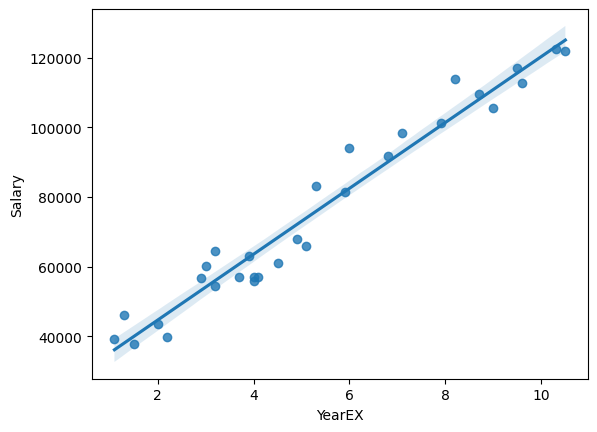

In [10]:
sns.regplot(x=dataset['YearEX'],y=dataset['Salary'])


In [13]:
dataset.corr()

,YearEX,Salary
YearEX,1.000000,0.978242
Salary,0.978242,1.000000


array([[<Axes: title={'center': 'YearEX'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

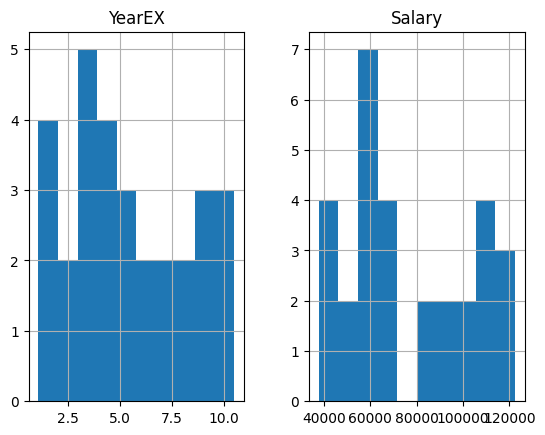

In [14]:
dataset.hist()

<ipython-input-15-9c4d05333103>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['YearEX'])


<Axes: xlabel='YearEX', ylabel='Density'>

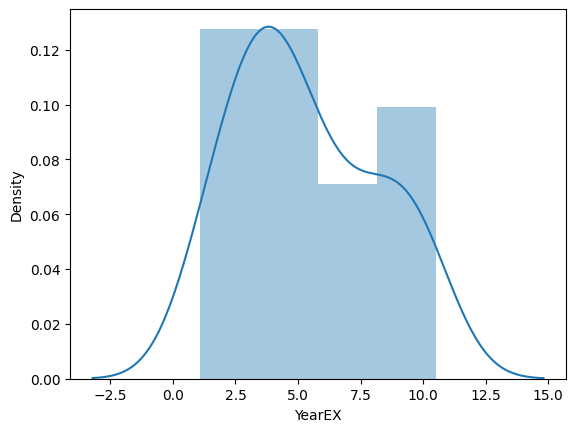

In [15]:

sns.distplot(dataset['YearEX'])

<ipython-input-16-9fd6134c9331>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

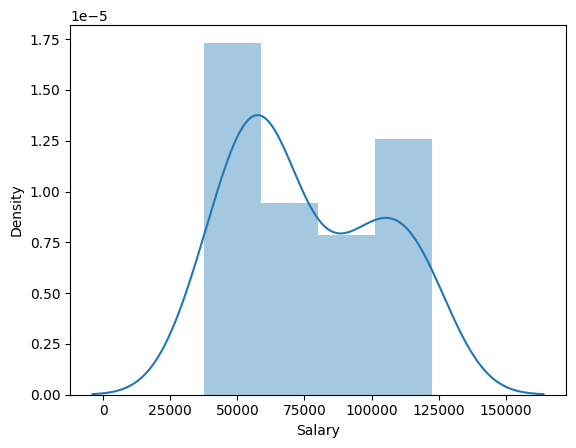

In [16]:
sns.distplot(dataset['Salary'])

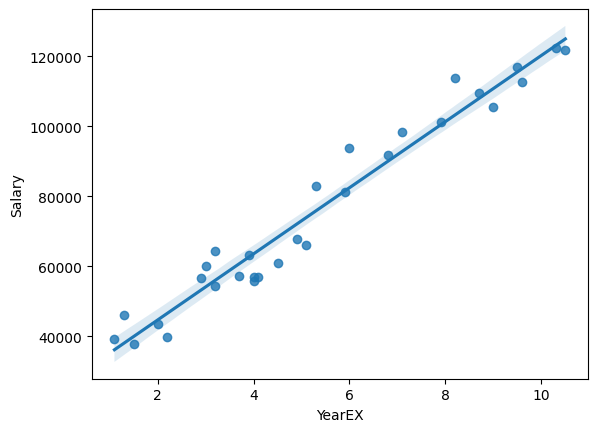

In [17]:
sns.regplot(x="YearEX", y="Salary", data=dataset);

# Model Building

In [18]:
model=smf.ols("Salary~YearEX",data=dataset).fit()


In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        05:21:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearEX      9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#Model Testing
# Finding Cefficient Parameters
model.params

Intercept    25792.200199
YearEX        9449.962321
dtype: float64

In [21]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept    11.346940
 YearEX       24.950094
 dtype: float64,
 Intercept    5.511950e-12
 YearEX       1.143068e-20
 dtype: float64)

In [22]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [23]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [24]:
# Automatic Prediction for say 3 & 5 Years Experience

In [25]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [26]:
data_pred=pd.DataFrame(new_data,columns=['YearEX'])
data_pred

,YearEX
0,3
1,5


In [27]:
model.predict(data_pred)


0    54142.087163
1    73042.011806
dtype: float64

In [28]:
model.mse_resid

33504591.131015327

In [29]:
np.sqrt(model.mse_resid)

5788.315051119395

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Salary_Data (3).csv')
data


In [33]:
X = data['YearsExperience'].values.reshape(-1, 1)  # Independent variable
y = data['Salary'].values  # Dependent variable

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)


In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 49830096.85590839
R-squared: 0.9024461774180497


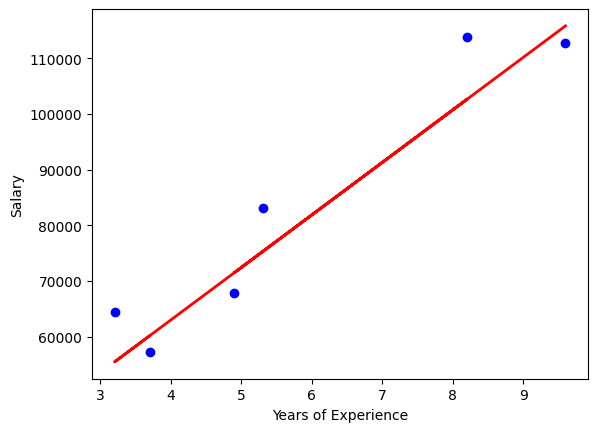

In [38]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
